___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [4]:
df = pd.read_csv("store_sharing.csv")


In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [20]:
df.shape

(17414, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [23]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### 3.Check missing values and if there are any dublicate rows or not.

In [24]:
df.duplicated().value_counts()
# Varsayılan olarak, yinelenen her değer kümesi için ilk oluşum False olarak, diğerleri ise True olarak ayarlanır.
# Tüm satırlar için false olduğuna göre yinelenen değer yok. 
# Ayrıca yinerelen değer olsaydı düşürmek için drop_duplicates kullanırdık.

False    17414
dtype: int64

In [25]:
df.isnull().sum()
# Burada verilerin boş olamdığını görüyoruz.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

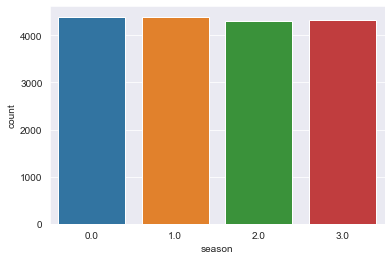

In [27]:
# season

sns.countplot(x = "season", data= df);

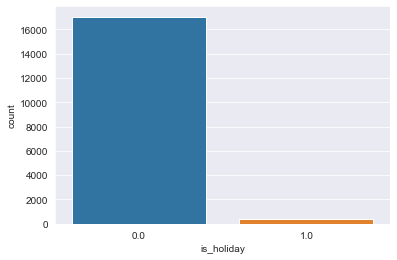

In [29]:
# is_holiday

sns.countplot(x="is_holiday", data= df);

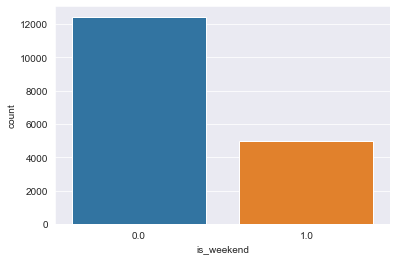

In [30]:
# is_weekend

sns.countplot(x="is_weekend", data = df);

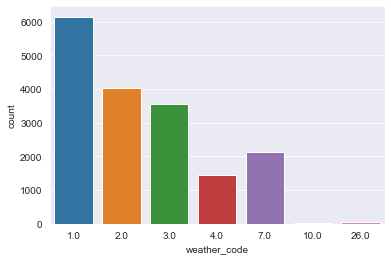

In [32]:
# weather_code

sns.countplot(x = "weather_code", data = df);

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.


In [34]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [33]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [35]:
df.timestamp = pd.to_datetime(df.timestamp)
# timestamp datetime cevirerek kendine atadık.

In [36]:
df.set_index("timestamp", inplace=True)
# timestamp i index olarak belirledik.

In [37]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [45]:
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_the_week"] =  df.index.dayofweek
df["day_of_the_month"] =  df.index.day
df["hour"] =  df.index.hour
df["year_mounth"] =  df.index.strftime("%Y-%m")

In [46]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_the_week,day_of_the_month,hour,year_mounth
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,4,2015-01


In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

In [47]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_the_week,day_of_the_month,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.068688,-0.017887,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,-0.002317,0.005072,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,-0.006824,0.006791,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,0.011556,-0.020868,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.001708,0.002040,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.020619,0.001904,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,-0.144628,0.042657,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.791975,0.005721,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,0.002356,-0.006460,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.002876,-0.021935,0.000542


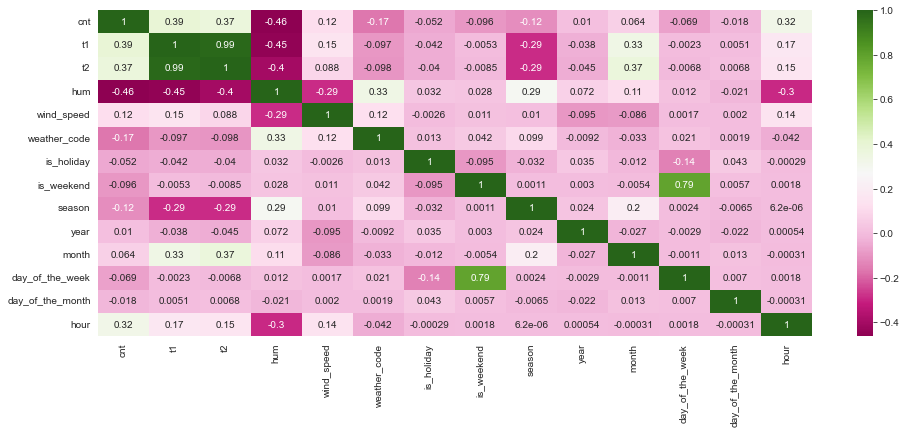

In [59]:
# plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.corr() ,  cmap="PiYG", annot=True);

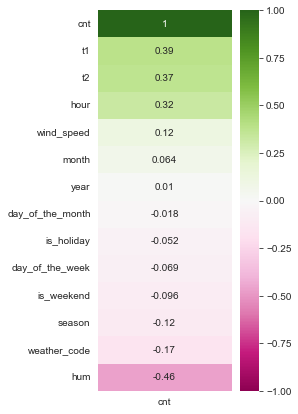

In [62]:
# for the target variable

plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[['cnt']].sort_values(by='cnt',ascending=False), annot=True, cmap='PiYG',vmin=-1);

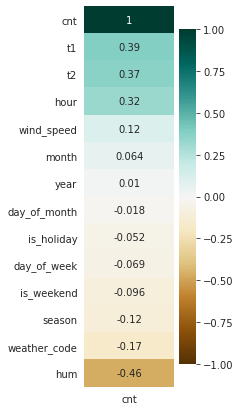

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

<Figure size 720x576 with 0 Axes>

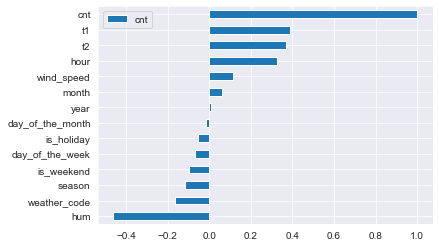

In [70]:
# with pandas

plt.figure(figsize=(10,8))
df.corr()[["cnt"]].sort_values(by="cnt").plot.barh()
plt.show()


In [ ]:
# 2.yol:

In [75]:
a = df.corr()[['cnt']].sort_values(by='cnt',ascending=True)
a

,cnt
hum,-0.462901
weather_code,-0.166633
season,-0.116180
is_weekend,-0.096499
day_of_the_week,-0.068688
is_holiday,-0.051698
day_of_the_month,-0.017887
year,0.010046
month,0.063757
wind_speed,0.116295


In [76]:
b = round(a,2)
b

,cnt
hum,-0.46
weather_code,-0.17
season,-0.12
is_weekend,-0.10
day_of_the_week,-0.07
is_holiday,-0.05
day_of_the_month,-0.02
year,0.01
month,0.06
wind_speed,0.12


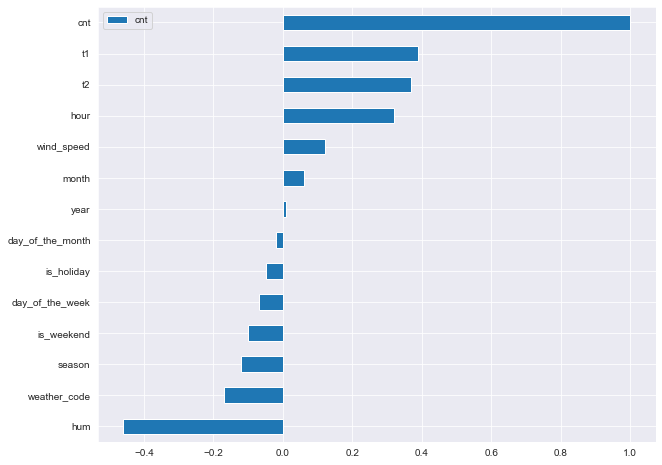

In [78]:
b.plot(kind="barh",y="cnt",figsize=(10,8));

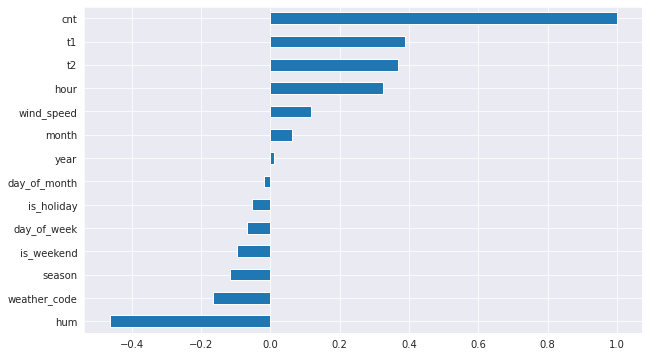

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

In [79]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_the_week,day_of_the_month,hour,year_mounth
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,4,2015-01


In [80]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

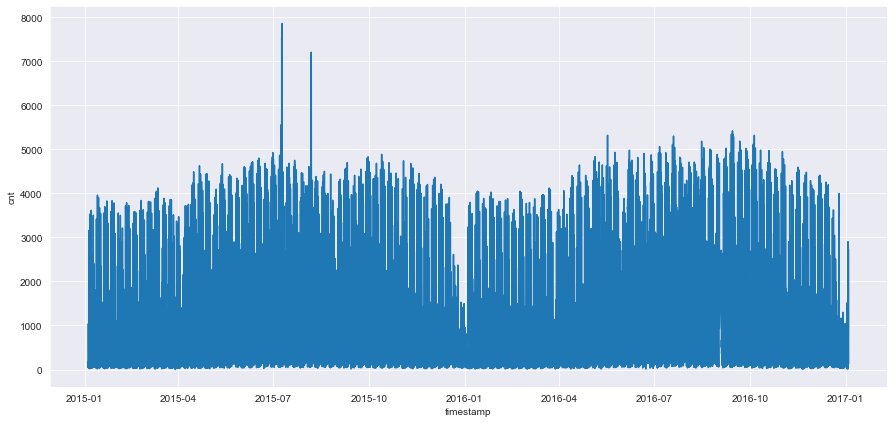

In [85]:
# with seaborn

plt.figure(figsize=(15,7))
sns.lineplot(x = df.index, y="cnt", data=df);

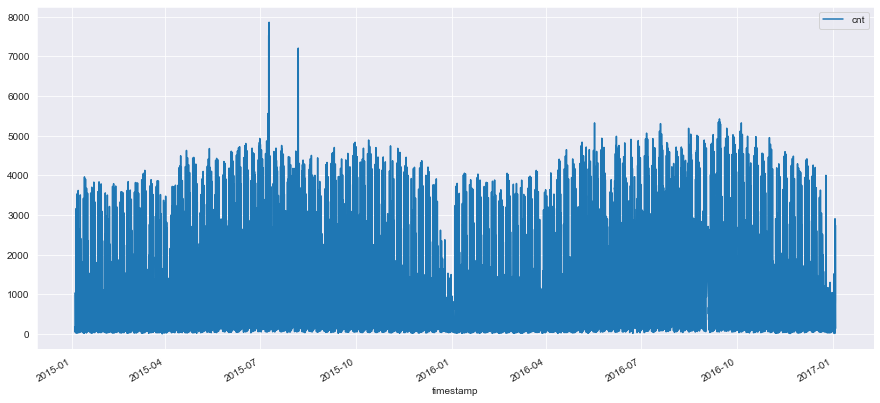

In [91]:
# with pandas

df.plot.line(y="cnt", figsize=(15,7));

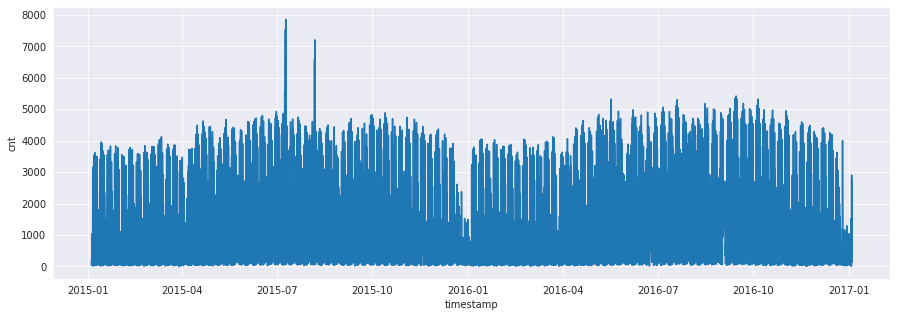

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [97]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_the_week,day_of_the_month,hour,year_mounth
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,4,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,4,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,4,2015-01


In [102]:
sum_ = df.groupby("year_mounth")[["cnt"]].sum()
sum_

,cnt
year_mounth,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


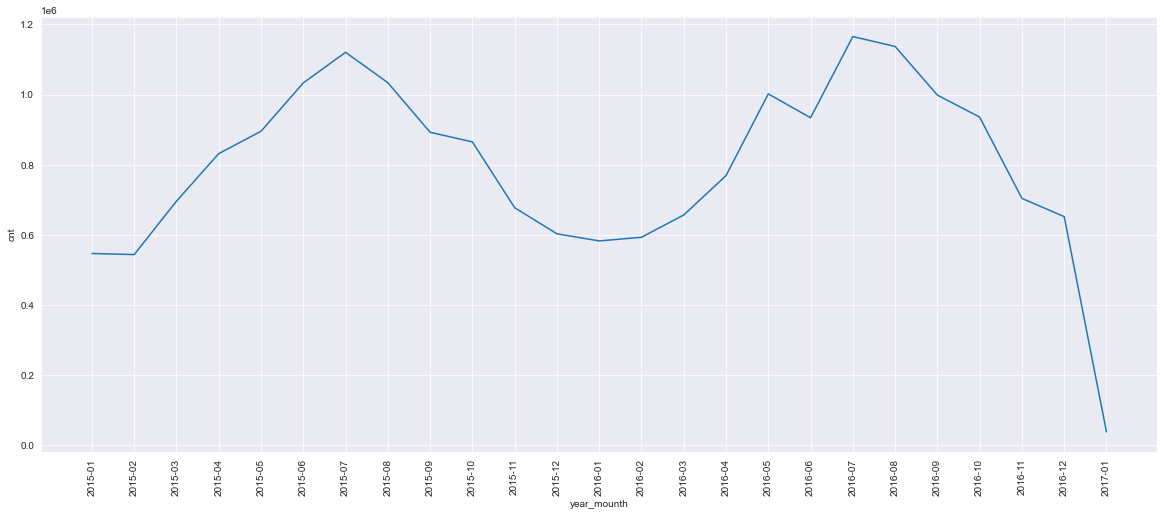

In [106]:
# with lineplot

plt.figure(figsize=(20,8))
sns.lineplot(x="year_mounth",y="cnt", data = sum_) # yeni df burda kullandık.
plt.xticks(rotation=90);

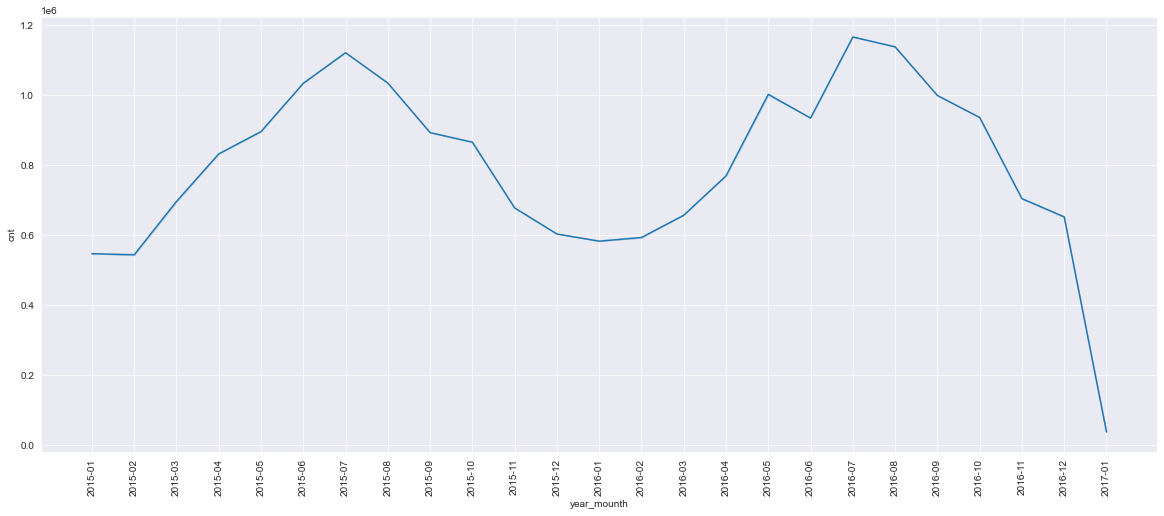

In [107]:
# 2.yol:
# yeni bit df oluşturmadan yapabilirz.

plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='year_mounth', y='cnt', ci=False, estimator=sum)
plt.xticks(rotation=90);

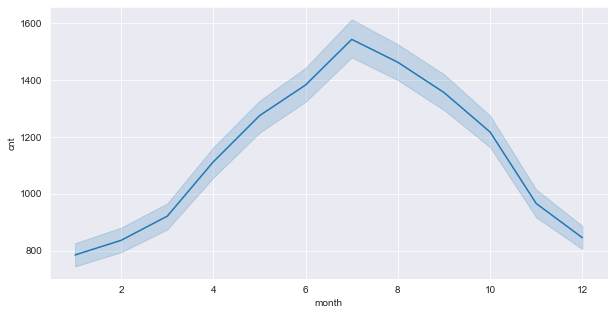

In [111]:
# with lineplot
plt.figure(figsize=(10,5))
sns.lineplot(x="month", y="cnt", data=df);


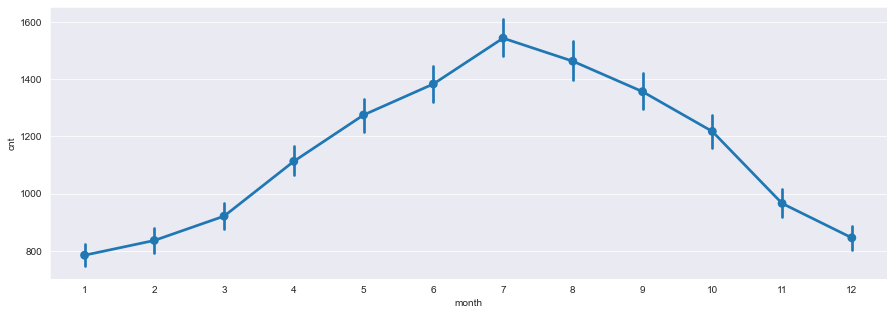

In [113]:
# with pointplot

plt.figure(figsize=(15,5))
sns.pointplot(x="month", y="cnt", data=df);


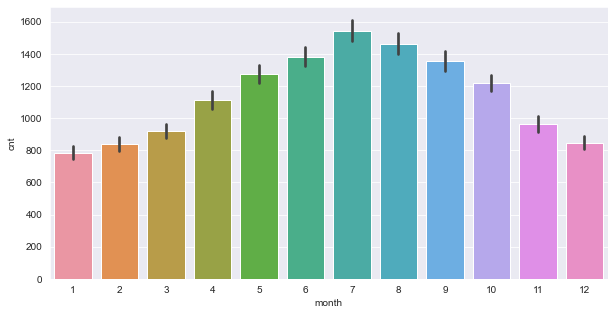

In [115]:
# with barplot

plt.figure(figsize=(10,5))
sns.barplot(x="month", y="cnt", data=df);


### 11.Plot bike shares by hours on (holidays, weekend, season)

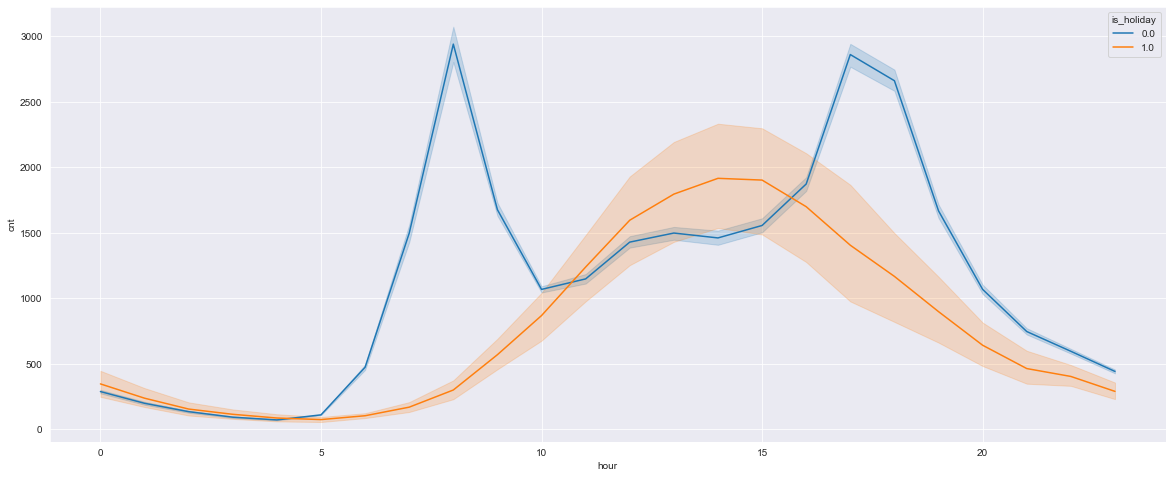

In [122]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="cnt", hue="is_holiday", data=df);


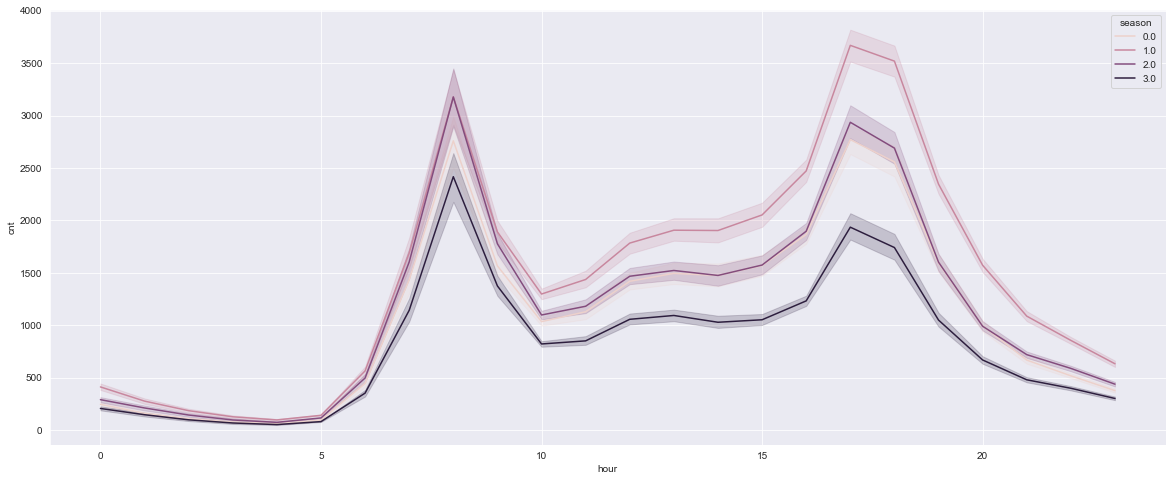

In [121]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(20,8))
sns.lineplot(x="hour", y="cnt", hue="season", data=df);


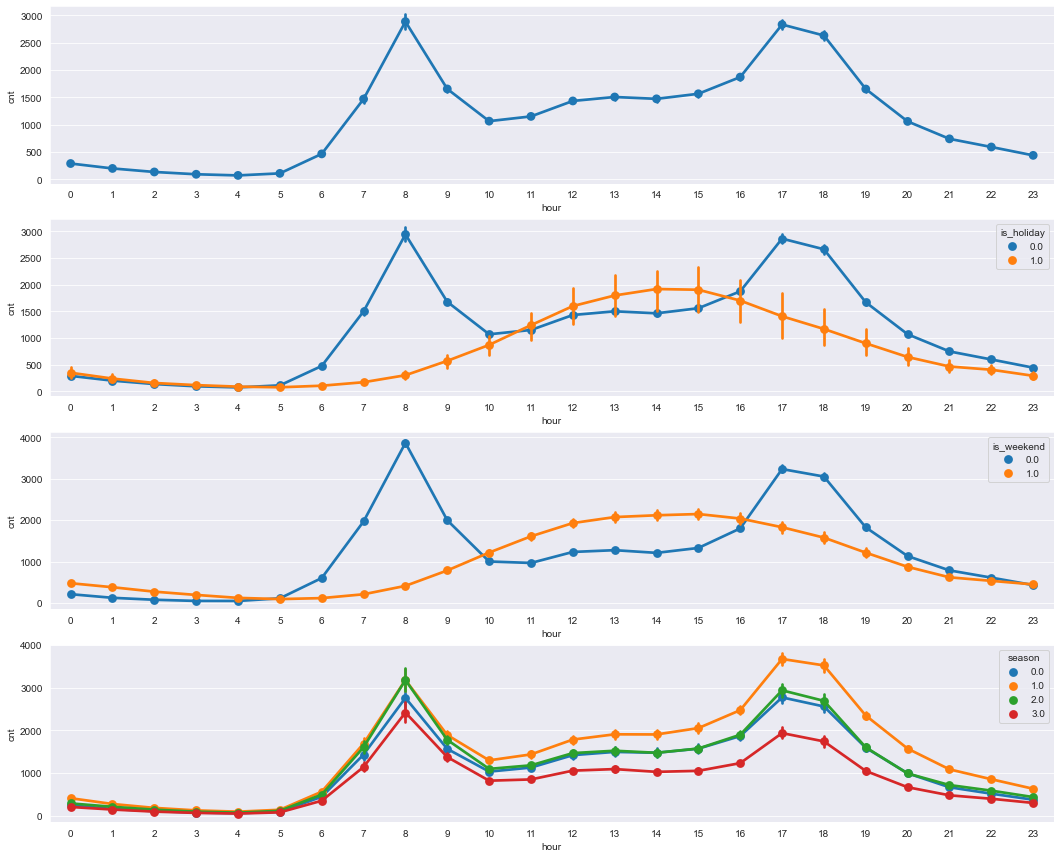

In [126]:
# with pointplot

fig, ax = plt.subplots(nrows=4,ncols=1, figsize= (18,15))
sns.pointplot(x = "hour", y="cnt", data=df, ax=ax[0])
sns.pointplot(x = "hour", y="cnt", data=df, hue="is_holiday" ,ax=ax[1])
sns.pointplot(x = "hour", y="cnt", data=df, hue="is_weekend" ,ax=ax[2])
sns.pointplot(x = "hour", y="cnt", data=df, hue="season" ,ax=ax[3]);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

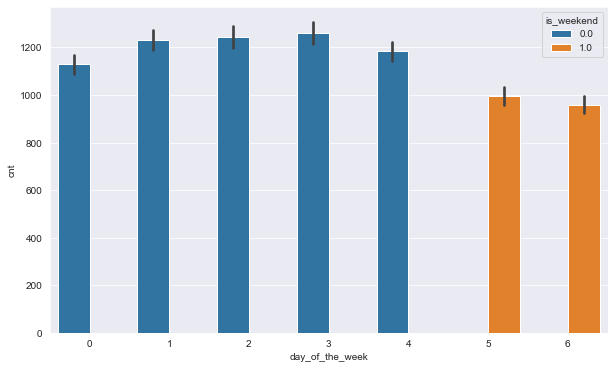

In [129]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(x="day_of_the_week", y="cnt", hue="is_weekend", data=df);

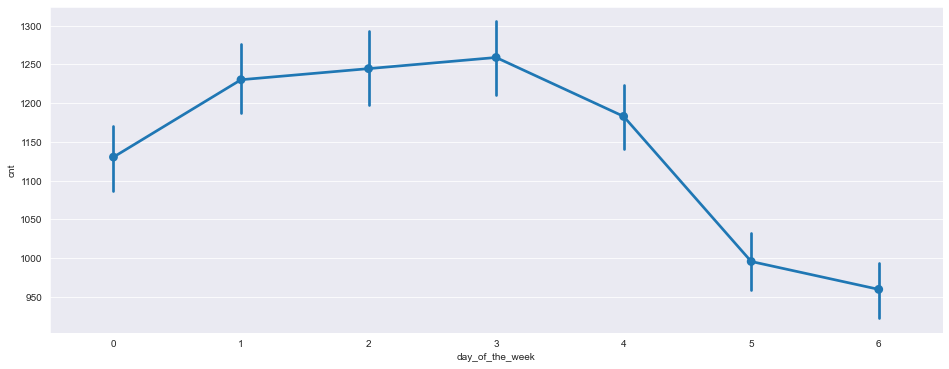

In [136]:
# with pointplot

plt.figure(figsize=(16,6))
sns.pointplot(x="day_of_the_week", y="cnt", data=df);



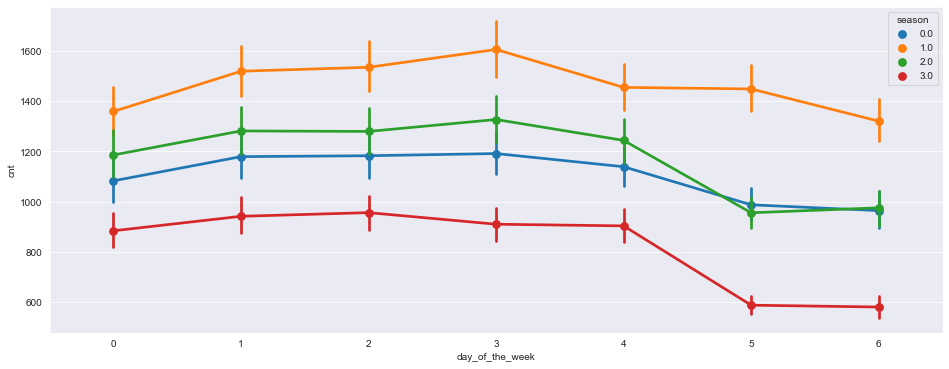

In [138]:
plt.figure(figsize=(16,6))
sns.pointplot(x="day_of_the_week", y="cnt", hue="season", data=df);


### 13.Plot bike shares by day of month

In [158]:
df.groupby("day_of_the_month")[["cnt"]].mean().astype("int").T

day_of_the_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


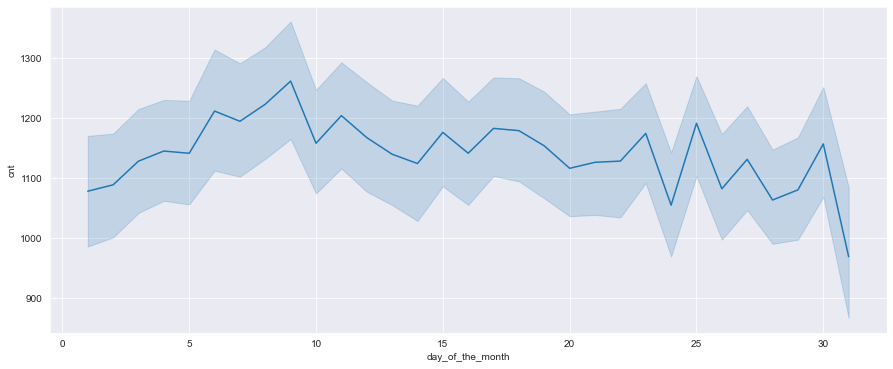

In [157]:
#with lineplot

plt.figure(figsize=(15,6))
sns.lineplot(x= "day_of_the_month", y="cnt", data=df);

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

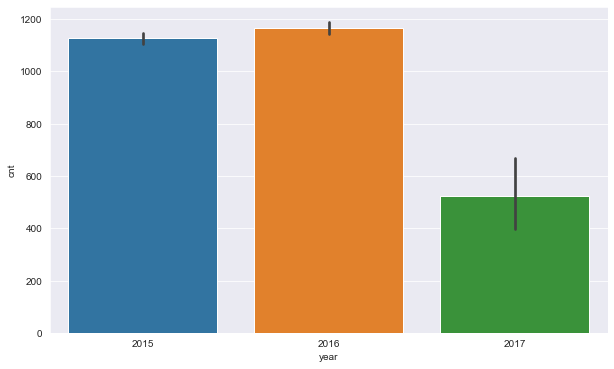

In [160]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(x="year",y="cnt", data=df);

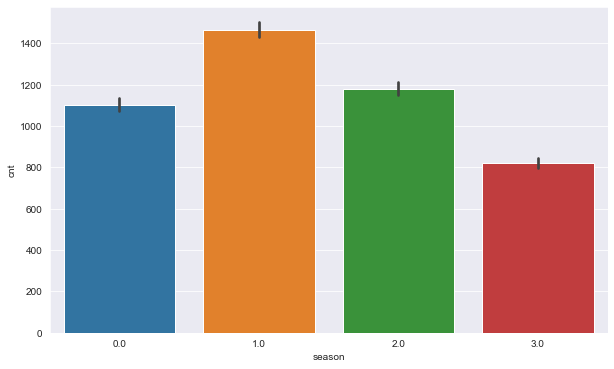

In [161]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(x="season",y="cnt", data=df);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [162]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

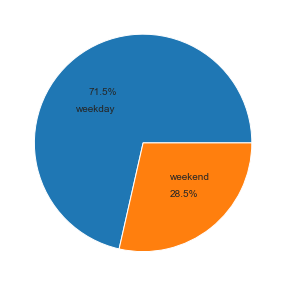

In [164]:
# pie chart

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df.is_weekend.value_counts(), labels=["weekday","weekend"], labeldistance=0.4, autopct="%.1f%%");

In [221]:
a = df.is_weekend.value_counts().sum()
b = df.is_weekend.value_counts()


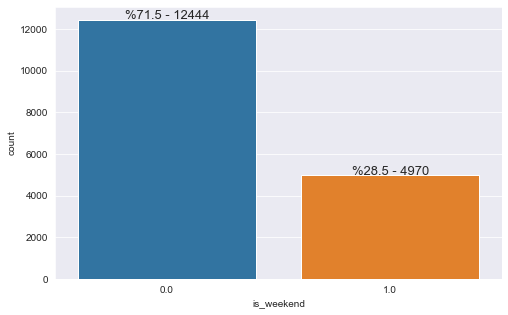

In [189]:
# with countplot

plt.figure(figsize=(8,5))

sns.countplot(x="is_weekend", data=df)

for i in range(len(b)):
    
    c = f'%{round((b[i]/a) * 100, 1)} - {b[i]}'
    
    plt.text(x=i, y=b[i] + 50, s = c, ha='center', size=13);

In [ ]:
# 2.yol:

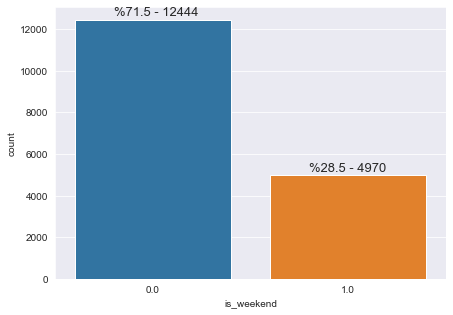

In [222]:
a = df.is_weekend.value_counts().sum()
b = df.is_weekend.value_counts()

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)

for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / a * 100, 1)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)


### 16.Plot the distribution of weather code by seasons

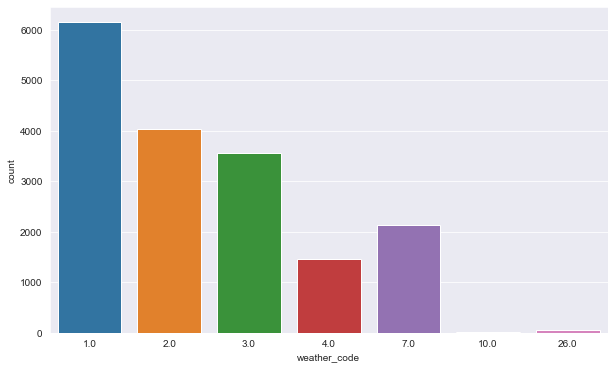

In [194]:
# with countplot

plt.figure(figsize=(10,6))
sns.countplot(x=df.weather_code);

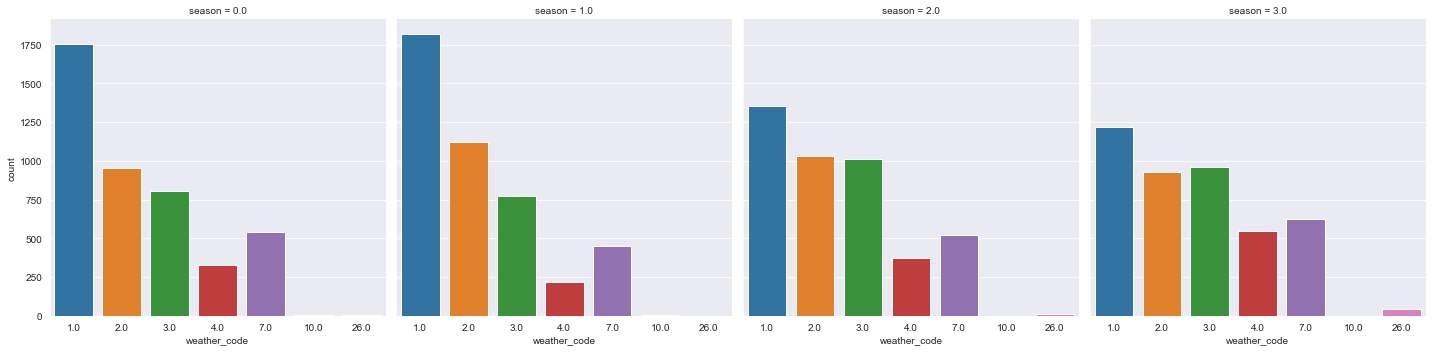

In [232]:
# with catplot

sns.catplot(data = df, x='weather_code',col='season', kind='count');

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___